Mean Squared Error: 0.21803753320311597


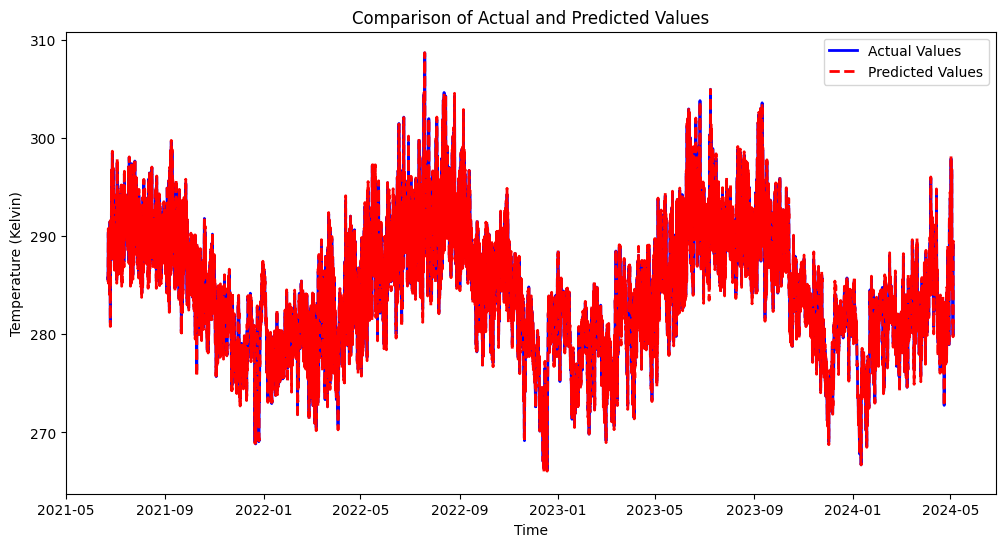

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime

# Load data
data = pd.read_csv('/Users/jakubsuszwedyk/Documents/University/Year_2/Project/Project_VSC_2/Project2-2/Project_2-2/NL_data/ams.csv')

# Convert 'time' to datetime
data['time'] = pd.to_datetime(data['time'])

# Create lagged features based on past temperature values
window_size = 3  # You can adjust the size of the window
for i in range(1, window_size + 1):
    data[f't2m_lag_{i}'] = data['t2m'].shift(i)

# Drop rows with NaN values which are the result of shifting
data = data.dropna()

# Re-establish 'time' as the DataFrame's index
data.set_index('time', inplace=True)

# Splitting data into features and target
X = data[[f't2m_lag_{i}' for i in range(1, window_size + 1)]]
y = data['t2m']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plotting Predicted vs Actual Values using line plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, color='blue', label='Actual Values', linewidth=2)
plt.plot(y_test.index, y_pred, color='red', label='Predicted Values', linewidth=2, linestyle='--')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Time')
plt.ylabel('Temperature (Kelvin)')
plt.legend()
plt.show()
